In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from keras.datasets import reuters

In [3]:
(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

2121728/2110848 [==============================] - 0s 0us/step


In [4]:
len(train_data), len(test_data)

(8982, 2246)

In [5]:
#decode
word_index = reuters.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decoded_newswire = ' '.join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

565248/550378 [==============================] - 0s 0us/step


In [6]:
decoded_newswire

'? ? ? said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3'

In [7]:
train_labels[10]

3

In [8]:
# 資料向量化[list -> 張量, one-hot(categorial encoding 分類編碼)]
import numpy as np

In [9]:
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

In [10]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [11]:
x_train, x_test

(array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]),
 array([[0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        ...,
        [0., 1., 0., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.],
        [0., 1., 1., ..., 0., 0., 0.]]))

In [12]:
#標籤向量化[list -> 張量, one-hot(categorial encoding 分類編碼)]
def to_one_hot(labels, dimension=46):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels):
        results[i, label] = 1.
    return results
    

In [13]:
one_hot_train_labels = to_one_hot(train_labels)
one_hot_test_labels = to_one_hot(test_labels)

In [14]:
one_hot_train_labels, one_hot_test_labels

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]))

In [15]:
#方法二(用於標籤)
from keras.utils.np_utils import to_categorical

In [16]:
one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

In [17]:
one_hot_train_labels, one_hot_test_labels

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

In [18]:
#建立神經網路
#輸出之類別更多，輸出空間維數需更大
from tensorflow import keras
from tensorflow.keras import layers

In [19]:
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

2022-08-08 15:34:45.685122: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [20]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['acc'])

In [21]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [22]:
#訓練模型
history = model.fit(partial_x_train, partial_y_train,
                   epochs=20,
                   batch_size=512,
                   validation_data=(x_val, y_val))

2022-08-08 15:34:46.523003: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/20
16/16 [==============================] - 1s 42ms/step - loss: 2.5114 - acc: 0.5010 - val_loss: 1.6690 - val_acc: 0.6410
Epoch 2/20
16/16 [==============================] - 0s 25ms/step - loss: 1.3915 - acc: 0.7046 - val_loss: 1.3049 - val_acc: 0.7130
Epoch 3/20
16/16 [==============================] - 0s 29ms/step - loss: 1.0380 - acc: 0.7785 - val_loss: 1.1229 - val_acc: 0.7610
Epoch 4/20
16/16 [==============================] - 0s 25ms/step - loss: 0.8035 - acc: 0.8312 - val_loss: 1.0175 - val_acc: 0.7910
Epoch 5/20
16/16 [==============================] - 0s 24ms/step - loss: 0.6427 - acc: 0.8671 - val_loss: 0.9518 - val_acc: 0.8070
Epoch 6/20
16/16 [==============================] - 0s 25ms/step - loss: 0.5076 - acc: 0.8963 - val_loss: 0.9557 - val_acc: 0.7890
Epoch 7/20
16/16 [==============================] - 0s 25ms/step - loss: 0.4140 - acc: 0.9158 - val_loss: 0.9028 - val_acc: 0.8080
Epoch 8/20
16/16 [==============================] - 0s 25ms/step - loss: 0.3352 - a

In [23]:
#繪製訓練和驗證損失
import matplotlib.pyplot as plt

In [24]:
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(loss) + 1)

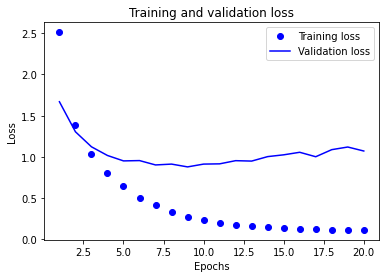

In [25]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

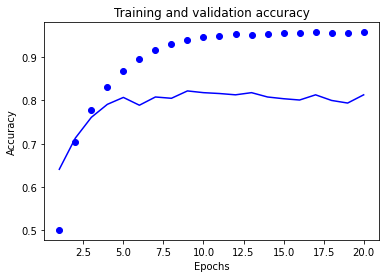

In [26]:
#plt.clf() 清除畫面

acc = history.history['acc']
val_acc = history.history['val_acc']

plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')

plt.show()

In [27]:
#重新訓練模型
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(10000,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(46, activation='softmax')
])

In [28]:
model.compile(optimizer='rmsprop',
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [29]:
model.fit(partial_x_train, partial_y_train,
         epochs=9,
         batch_size=512,
         validation_data=(x_val, y_val))

Epoch 1/9
16/16 [==============================] - 1s 41ms/step - loss: 2.6026 - accuracy: 0.5353 - val_loss: 1.6782 - val_accuracy: 0.6520
Epoch 2/9
16/16 [==============================] - 0s 25ms/step - loss: 1.3919 - accuracy: 0.7097 - val_loss: 1.2834 - val_accuracy: 0.7110
Epoch 3/9
16/16 [==============================] - 0s 26ms/step - loss: 1.0389 - accuracy: 0.7770 - val_loss: 1.1080 - val_accuracy: 0.7620
Epoch 4/9
16/16 [==============================] - 0s 26ms/step - loss: 0.8193 - accuracy: 0.8289 - val_loss: 1.0094 - val_accuracy: 0.7840
Epoch 5/9
16/16 [==============================] - 0s 29ms/step - loss: 0.6527 - accuracy: 0.8641 - val_loss: 0.9267 - val_accuracy: 0.8060
Epoch 6/9
16/16 [==============================] - 0s 25ms/step - loss: 0.5203 - accuracy: 0.8923 - val_loss: 0.8881 - val_accuracy: 0.8180
Epoch 7/9
16/16 [==============================] - 0s 25ms/step - loss: 0.4176 - accuracy: 0.9136 - val_loss: 0.9076 - val_accuracy: 0.7960
Epoch 8/9
16/16 [===

In [30]:
results = model.evaluate(x_test, one_hot_test_labels)

results #[損失分數， 準確度]

71/71 [==============================] - 0s 3ms/step - loss: 1.0324 - accuracy: 0.7774


[1.03239905834198, 0.7773820161819458]

In [31]:
#純隨機猜測
#二元分類: 50%
#對同樣test_label:

import copy

test_labels_copy = copy.copy(test_labels)
np.random.shuffle(test_labels_copy)
hits_array = np.array(test_labels) == np.array(test_labels_copy)

float(np.sum(hits_array)) / len(test_labels)

#只有約20% -> model > 隨機分類

0.19056099732858414

In [32]:
#對資料產生預測值
predictions = model.predict(x_test)

In [33]:
predictions[0].shape #每個項目的預測prediction都是長度46的向量

(46,)

In [34]:
np.round(np.sum(predictions[0]), 3) #向量中係數總和為1(機率總和為1)

1.0

In [35]:
np.argmax(predictions[0]) #最高機率的類別

3

In [36]:
#另一種方式處理標籤與損失
#原本: one-hot, 現在: 整數張量
y_train = np.array(train_labels)
y_test = np.array(test_labels)
#注意: 損失函數: categorical_crossentropy -> sparse_categorical_crossentropy
#輸出:         [1, 0, 0]                   [0]
#             [0, 1, 0]                   [1]
#             [0, 0, 1]                   [2]